### 单个化合物

In [1]:
from rdkit import Chem
from rdkit.Chem import Descriptors, QED

# 定义或读取一个分子
smiles = 'CCO'  # 举例，乙醇的 SMILES 表示
mol = Chem.MolFromSmiles(smiles)

# 计算分子量
mw = Descriptors.MolWt(mol)
print(f"Molecular Weight (MW): {mw} g/mol")

# 计算拓扑极性表面积
tpsa = Descriptors.TPSA(mol)
print(f"Topological Polar Surface Area (TPSA): {tpsa} Å²")

# 计算氢键受体数量
hba = Descriptors.NumHAcceptors(mol)
print(f"Hydrogen Bond Acceptors (HBA): {hba}")

# 计算氢键供体数量
hbd = Descriptors.NumHDonors(mol)
print(f"Hydrogen Bond Donors (HBD): {hbd}")

# 计算LogP
logp = Descriptors.MolLogP(mol)
print(f"LogP: {logp}")

# 计算QED分数
qed_score = QED.qed(mol)
print(f"QED Score: {qed_score}")


Molecular Weight (MW): 46.069 g/mol
Topological Polar Surface Area (TPSA): 20.23 Å²
Hydrogen Bond Acceptors (HBA): 1
Hydrogen Bond Donors (HBD): 1
LogP: -0.0014000000000000123
QED Score: 0.40680796565539457


### 批量读取scv文件

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors, QED

# 读取数据
data = pd.read_csv('./物理属性/MGAM-dataset02.csv')

# 计算描述符的函数
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return {
        "MW": Descriptors.MolWt(mol),
        "TPSA": Descriptors.TPSA(mol),
        "HBA": Descriptors.NumHAcceptors(mol),
        "HBD": Descriptors.NumHDonors(mol),
        "LogP": Descriptors.MolLogP(mol),
        "QED": QED.qed(mol)
    }

# 应用函数计算物理性质
properties = data['canonical_smiles'].apply(calculate_descriptors)
properties_df = pd.DataFrame(properties.tolist())

# 合并数据帧
result_df = pd.concat([data, properties_df], axis=1)

# 保存到CSV
result_df.to_csv('./物理属性/MGAM_物理属性.csv', index=False)


### 数据可视化

In [12]:
from matplotlib import font_manager, pyplot as plt

# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称，并确保字体能支持加粗
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f and 'Bold' in f]

if t_nr_path:
    # 如果找到了Times New Roman Bold字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
    plt.rcParams['font.weight'] = 'bold'  # 设置字体为加粗
else:
    # 如果没有找到加粗的Times New Roman，尝试设置为普通的Times New Roman并加粗
    t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]
    if t_nr_path:
        prop = font_manager.FontProperties(fname=t_nr_path[0])
        plt.rcParams['font.family'] = prop.get_name()
        plt.rcParams['font.weight'] = 'bold'
    else:
        # 如果没有找到Times New Roman，使用默认的衬线字体并设置为加粗
        plt.rcParams['font.family'] = 'serif'
        plt.rcParams['font.weight'] = 'bold'

In [13]:
from matplotlib import font_manager
# 查找系统中所有可用的Times New Roman字体的路径
times_new_roman = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# 从列表中找到一个指定的字体名称
t_nr_path = [f for f in times_new_roman if 'Times New Roman' in f]

if t_nr_path:
    # 如果找到了Times New Roman字体，设置为默认字体
    prop = font_manager.FontProperties(fname=t_nr_path[0])
    plt.rcParams['font.family'] = prop.get_name()
else:
    # 如果没有找到，使用另一种可用的衬线字体
    plt.rcParams['font.family'] = 'serif'

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


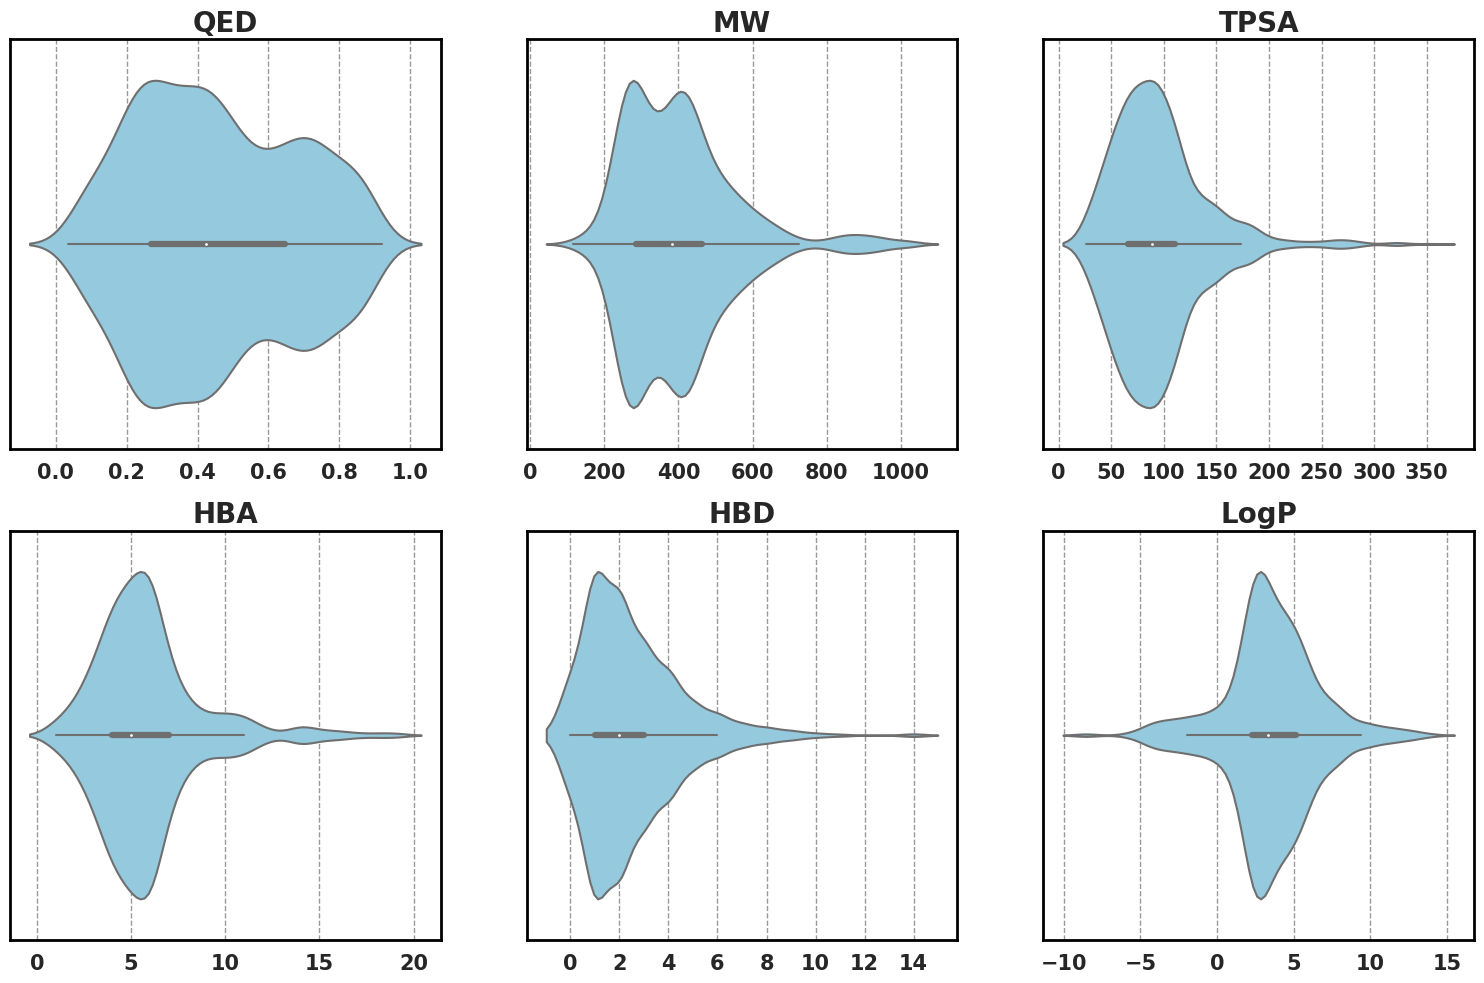

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载数据
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')

# 设置绘图样式
sns.set(style="whitegrid")
plt.rc('axes', edgecolor='black', linewidth=2)  # 设置边框颜色和宽度
plt.rc('grid', linestyle="--", color='#999999')  # 设置网格线为黑色虚线

# 创建一个画布，设置大小
plt.figure(figsize=(15, 10))

# 定义子图的布局
features = ["QED", "MW", "TPSA", "HBA", "HBD", "LogP"]
n = len(features)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols  # 确保有足够的行

for index, feature in enumerate(features):
    plt.subplot(n_rows, n_cols, index + 1)
    sns.violinplot(x=data[feature], color="skyblue")
    plt.title(feature, fontsize=20, fontweight='bold', fontname='Times New Roman')  # 设置标题的字体大小为20，字体加粗
    plt.xlabel('')  # 将X轴的标题设置为空字符串
    plt.xticks(fontsize=15, fontname='Times New Roman')  # 设置 X 轴坐标字体

# 调整子图间距
plt.tight_layout()

# 设置图表样式
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # 调整子图间的间距
plt.rcParams['axes.linewidth'] = 1  # 设置边框宽度
# sns.set_style("whitegrid", {'axes.edgecolor': 'black',  # 设置边框为黑色
#                             'grid.linestyle': '--',    # 设置网格线为虚线
#                             'grid.color': 'black',     # 设置网格线颜色为黑色
#                             'axes.linewidth': 1})      # 设置边框粗细为1

plt.savefig("./物理属性/MGAM物理属性.svg", bbox_inches="tight", dpi=600) # 保存图形
# 显示图形
plt.show()

* QED 分数在0.4以上可能表示较好的药物类候选性，而接近1的分数则表示非常理想的药物属性。
* 理想的分子量应小于或等于500 Dalton。
* TPSA 小于140Å²的化合物具有较好的口服生物可用性。
* 理想的氢键受体数应小于或等于10。
* 理想的氢键供体数应小于或等于5。
* 理想的LogP应小于或等于5。

In [1]:
from rdkit import Chem
from rdkit.Chem import QED
import pandas as pd

# 假设数据集是一个CSV文件，其中包含一个名为'SMILES'的列
# 读取CSV文件
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')  # 替换成你的文件路径

# 计算QED值
data['QED'] = data['canonical_smiles'].apply(lambda x: QED.qed(Chem.MolFromSmiles(x)))

# 计算QED大于0.4的化合物的比例
qed_threshold = 0.4
num_high_qed = data[data['QED'] > qed_threshold].shape[0]
total_compounds = data.shape[0]
percentage_high_qed = (num_high_qed / total_compounds) * 100

print(f"Percentage of compounds with QED > 0.4: {percentage_high_qed:.2f}%")


Percentage of compounds with QED > 0.4: 54.72%


In [2]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

# 假设数据集是一个CSV文件，其中包含一个名为'SMILES'的列
# 读取CSV文件
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')  # 替换成你的文件路径

# 计算分子量
data['Molecular_Weight'] = data['canonical_smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))

# 计算分子量小于等于500 Dalton的化合物的比例
mw_threshold = 500
num_low_mw = data[data['Molecular_Weight'] <= mw_threshold].shape[0]
total_compounds = data.shape[0]
percentage_low_mw = (num_low_mw / total_compounds) * 100

print(f"Percentage of compounds with Molecular Weight <= 500 Dalton: {percentage_low_mw:.2f}%")


Percentage of compounds with Molecular Weight <= 500 Dalton: 81.47%


In [3]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pandas as pd

# 假设数据集是一个CSV文件，其中包含一个名为'SMILES'的列
# 读取CSV文件
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')  # 替换成你的文件路径

# 计算TPSA
data['TPSA'] = data['canonical_smiles'].apply(lambda x: rdMolDescriptors.CalcTPSA(Chem.MolFromSmiles(x)))

# 计算TPSA小于140 Å²的化合物的比例
tpsa_threshold = 140
num_low_tpsa = data[data['TPSA'] <= tpsa_threshold].shape[0]
total_compounds = data.shape[0]
percentage_low_tpsa = (num_low_tpsa / total_compounds) * 100

print(f"Percentage of compounds with TPSA <= 140 Å²: {percentage_low_tpsa:.2f}%")


Percentage of compounds with TPSA <= 140 Å²: 87.45%


In [4]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pandas as pd

# 假设数据集是一个CSV文件，其中包含一个名为'SMILES'的列
# 读取CSV文件
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')  # 替换成你的文件路径

# 计算氢键受体数
data['HBA'] = data['canonical_smiles'].apply(lambda x: rdMolDescriptors.CalcNumHBA(Chem.MolFromSmiles(x)))

# 计算氢键受体数小于或等于10的化合物的比例
hba_threshold = 10
num_low_hba = data[data['HBA'] <= hba_threshold].shape[0]
total_compounds = data.shape[0]
percentage_low_hba = (num_low_hba / total_compounds) * 100

print(f"Percentage of compounds with HBA <= 10: {percentage_low_hba:.2f}%")


Percentage of compounds with HBA <= 10: 92.73%


In [5]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
import pandas as pd

# 假设数据集是一个CSV文件，其中包含一个名为'SMILES'的列
# 读取CSV文件
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')  # 替换成你的文件路径

# 计算氢键供体数
data['HBD'] = data['canonical_smiles'].apply(lambda x: rdMolDescriptors.CalcNumHBD(Chem.MolFromSmiles(x)))

# 计算氢键供体数小于或等于5的化合物的比例
hbd_threshold = 5
num_low_hbd = data[data['HBD'] <= hbd_threshold].shape[0]
total_compounds = data.shape[0]
percentage_low_hbd = (num_low_hbd / total_compounds) * 100

print(f"Percentage of compounds with HBD <= 5: {percentage_low_hbd:.2f}%")


Percentage of compounds with HBD <= 5: 91.69%


In [6]:
from rdkit import Chem
from rdkit.Chem import Crippen
import pandas as pd

# 假设数据集是一个CSV文件，其中包含一个名为'SMILES'的列
# 读取CSV文件
data = pd.read_csv('./物理属性/MGAM_物理属性.csv')  # 替换成你的文件路径

# 计算LogP
data['LogP'] = data['canonical_smiles'].apply(lambda x: Crippen.MolLogP(Chem.MolFromSmiles(x)))

# 计算LogP小于或等于5的化合物的比例
logp_threshold = 5
num_low_logp = data[data['LogP'] <= logp_threshold].shape[0]
total_compounds = data.shape[0]
percentage_low_logp = (num_low_logp / total_compounds) * 100

print(f"Percentage of compounds with LogP <= 5: {percentage_low_logp:.2f}%")


Percentage of compounds with LogP <= 5: 73.33%


### Murcko scaffold

In [1]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# 加载数据
file_path = './Murcko_scaffold/MGAM-dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 提取Murcko scaffold并统计数量
scaffold_set = set()

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    scaffold_set.add(scaffold_smiles)

# 计算不同Murcko scaffold的数量
scaffold_count = len(scaffold_set)

print("Number of unique Murcko scaffolds:", scaffold_count)


Number of unique Murcko scaffolds: 394


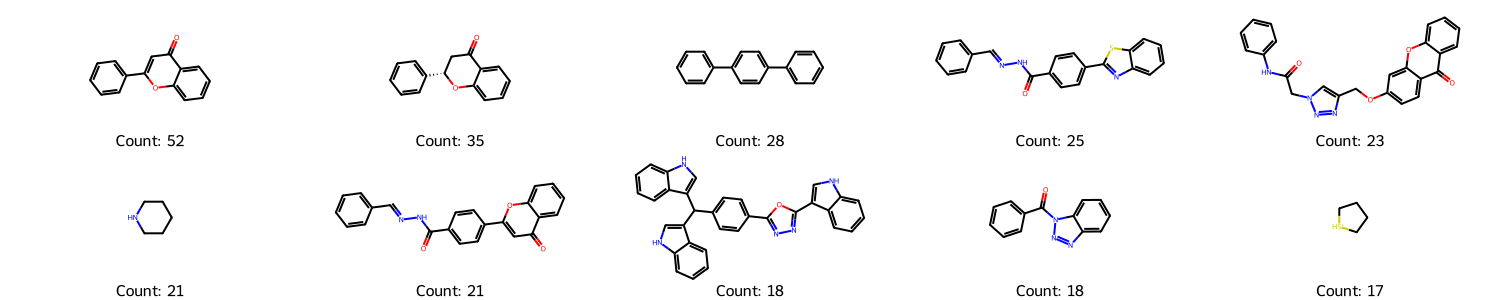

In [31]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Scaffolds import MurckoScaffold
import matplotlib.pyplot as plt

# 加载数据
file_path = './Murcko_scaffold/MGAM-dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 提取Murcko scaffold并统计数量
scaffold_dict = {}

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    scaffold = MurckoScaffold.GetScaffoldForMol(mol)
    scaffold_smiles = Chem.MolToSmiles(scaffold)
    if scaffold_smiles in scaffold_dict:
        scaffold_dict[scaffold_smiles] += 1
    else:
        scaffold_dict[scaffold_smiles] = 1

# 对scaffold按照出现频率排序
sorted_scaffolds = sorted(scaffold_dict.items(), key=lambda item: item[1], reverse=True)

# 提取前10个最常见的scaffold
top_10_scaffolds = sorted_scaffolds[:10]

# 绘制前10个scaffold
scaffold_mols = [Chem.MolFromSmiles(s[0]) for s in top_10_scaffolds]
scaffold_labels = [f"Count: {s[1]}" for s in top_10_scaffolds]

# 生成图片
img = Draw.MolsToGridImage(scaffold_mols, molsPerRow=5, subImgSize=(300, 150), legends=scaffold_labels)

img

### 碳骨架

In [163]:
import pandas as pd
from rdkit import Chem

# 加载数据
file_path = './Murcko_scaffold/MGAM_dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 计算每个分子中碳骨架的数量
carbon_counts = []

for smi in smiles_list:
    mol = Chem.MolFromSmiles(smi)
    if mol:  # 确保mol对象有效
        carbon_count = sum(1 for atom in mol.GetAtoms() if atom.GetSymbol() == 'C')
        carbon_counts.append(carbon_count)
    else:
        carbon_counts.append(0)  # 对于无法解析的SMILES，记录为0

# 将碳原子数添加到原数据框中
data['carbon_count'] = carbon_counts

# 输出数据框以查看结果
print(data[['canonical_smiles', 'carbon_count']]) # 得到每个化合物中碳原子的确切数量

# 可选：保存结果到新文件
data.to_csv('./碳骨架/MGAM_carbon_count.csv', index=False)


                                       canonical_smiles  carbon_count
0     CO[C@H]1O[C@H](C)[C@@H](N[C@H]2C[C@](O)(CO)[C@...            14
1     OC[C@@]1(O)C[C@H](NC[C@H](O)c2ccccc2)[C@H](O)[...            15
2     OC[C@@]1(O)C[C@H](N[C@@H]2CCCC[C@H]2O)[C@H](O)...            13
3     OC[C@H](N[C@H]1C[C@](O)(CO)[C@@H](O)[C@H](O)[C...            15
4     OCN(CO)[C@H]1C[C@](O)(CO)[C@@H](O)[C@H](O)[C@H]1O             9
...                                                 ...           ...
1150              Cc1c2c(n(n1)C)N[C@@H]3CCCCC[C@@H]3CN2            13
1151                  COc1cc2c(cc1F)NC[C@H]3COC[C@H]3N2            12
1152                   CC(C)(C)c1c(c(n(n1)c2ccncc2)N)Cl            12
1153                    COc1cccc(c1F)c2[nH]c3c(n2)CNCC3            13
1154                       Cc1ccccc1Oc2c(c(nc(n2)C)Cl)N            12

[1155 rows x 2 columns]


### 计算pIC50

In [4]:
import pandas as pd
import numpy as np

# 加载CSV文件
file_path = './Murcko_scaffold/MGAM_dataset02.csv'
data = pd.read_csv(file_path)

# 计算pIC50
data['pIC50'] = -np.log10(data['standard_value'] * 1e-9)

# 保存修改后的CSV文件
modified_file_path = './Murcko_scaffold/MGAM_dataset02_pIC50.csv'
data.to_csv(modified_file_path, index=False)


### 提取Murcko scaffold并计算频率

In [7]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# 加载CSV文件
file_path = './Murcko_scaffold/MGAM_dataset02_pIC50.csv'
data = pd.read_csv(file_path)

# 确保SMILES列的名称与您的数据集中的名称匹配
smiles_column = 'canonical_smiles'

# 计算Murcko scaffold
data['Murcko_Scaffold'] = data[smiles_column].apply(
    lambda x: Chem.MolToSmiles(
        MurckoScaffold.GetScaffoldForMol(Chem.MolFromSmiles(x)), isomericSmiles=True
    )
)

# 计算每个骨架的频率
scaffold_counts = data['Murcko_Scaffold'].value_counts().reset_index()
scaffold_counts.columns = ['Murcko_Scaffold', 'Frequency']

# 保存提取的Murcko scaffold和频率到CSV文件
scaffold_counts.to_csv('./Murcko_scaffold/scaffold_frequencies.csv', index=False)

print(scaffold_counts)


                                       Murcko_Scaffold  Frequency
0                          O=c1cc(-c2ccccc2)oc2ccccc12         52
1                      O=C1C[C@@H](c2ccccc2)Oc2ccccc21         35
2                       c1ccc(-c2ccc(-c3ccccc3)cc2)cc1         28
3          O=C(N/N=C/c1ccccc1)c1ccc(-c2nc3ccccc3s2)cc1         25
4    O=C(Cn1cc(COc2ccc3c(=O)c4ccccc4oc3c2)nn1)Nc1cc...         23
..                                                 ...        ...
389   O=c1c(-c2ccccc2)coc2cc3c(cc12)[C@H]1CCC[C@H]1CO3          1
390          O=C1C[C@@H](c2ccccc2)Oc2ccc(C3CCCCN3)cc21          1
391         O=C1C[C@@H](c2ccccc2)Oc2ccc(CN3CCCCC3)cc21          1
392         O=C1C[C@@H](c2ccccc2)Oc2ccc(CN3CCOCC3)cc21          1
393                      c1ccc(-c2nc3c([nH]2)CCNC3)cc1          1

[394 rows x 2 columns]


### 计算每个化合物的Murcko scaffold

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem.Scaffolds import MurckoScaffold

# 加载CSV文件
file_path = './Murcko_scaffold/MGAM_dataset02_pIC50.csv'
data = pd.read_csv(file_path)

# 确保SMILES列的名称与您的数据集中的名称匹配
smiles_column = 'canonical_smiles'

# 定义一个函数来计算Murcko scaffold
def calculate_scaffold(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:  # 确保SMILES字符串有效
        scaffold = MurckoScaffold.GetScaffoldForMol(mol)
        scaffold_smiles = Chem.MolToSmiles(scaffold)
        return scaffold_smiles
    return None

# 计算每个化合物的Murcko scaffold并添加到新列
data['Murcko_Scaffold'] = data[smiles_column].apply(calculate_scaffold)

# 保存修改后的CSV文件
modified_file_path = './Murcko_scaffold/MGAM_pIC50_Murcko.csv'
data.to_csv(modified_file_path, index=False)


* 合并MGAM_pIC50_Murcko.csv和scaffold_frequencies.csv

In [9]:
import pandas as pd

# 加载两个CSV文件
data_path = './Murcko_scaffold/MGAM_pIC50_Murcko.csv'
frequency_path = './Murcko_scaffold/scaffold_frequencies.csv'
data = pd.read_csv(data_path)
frequencies = pd.read_csv(frequency_path)

# 根据'Murcko_Scaffold'列合并数据
merged_data = pd.merge(data, frequencies, on='Murcko_Scaffold', how='left')

# 保存合并后的数据到新的CSV文件
merged_data.to_csv('./Murcko_scaffold/merged_MGAM_pIC50_Scaffolds.csv', index=False)

print("数据合并完毕，文件已保存。")


数据合并完毕，文件已保存。


### 可视化pIC50与Frequency间散点图

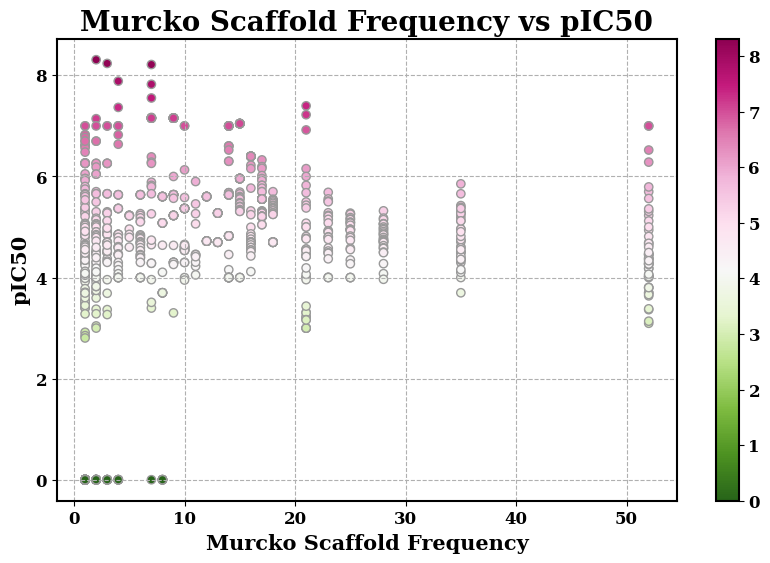

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 加载合并后的CSV文件
file_path = './Murcko_scaffold/merged_MGAM_pIC50_Scaffolds.csv'
data = pd.read_csv(file_path)

# 绘制散点图，X轴为'Frequency', Y轴为'pIC50'，点的颜色基于'pIC50'的值
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data['Frequency'], data['pIC50'], c=data['pIC50'], cmap='PiYG_r', 
                      alpha=1, edgecolors='#999999', linewidth=1)  # 添加边框
colorbar = plt.colorbar(scatter)  # 添加显色条

# 设置图表标题和坐标轴标签
plt.title('Murcko Scaffold Frequency vs pIC50', fontsize=20, fontweight='bold')
plt.xlabel('Murcko Scaffold Frequency', fontsize=15, fontweight='bold')
plt.ylabel('pIC50', fontsize=15, fontweight='bold')

# 设置坐标轴数值字体大小为12
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# 设置图例字体大小为12
colorbar.ax.tick_params(labelsize=12)

# 加粗图框边缘
ax = plt.gca()  # 获取当前轴
for spine in ax.spines.values():
    spine.set_linewidth(1.5)  # 设置边框线宽为2
    
# 设置图例边框宽度
colorbar.outline.set_linewidth(1.5)

# 设置网格线为虚线
plt.grid(True, linestyle='--')

# 保存图片为SVG格式
plt.savefig('./Murcko_scaffold/Murcko_pIC50_plot.svg', format='svg')

plt.show()


### 谷本相似性MACCs

In [6]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import MACCSkeys
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

# 加载数据
file_path = './物理属性/MGAM-dataset02.csv'  # 替换为你的文件路径
data = pd.read_csv(file_path)

# 提取SMILES列
smiles_list = data['canonical_smiles']

# 计算分子指纹（以MACCs指纹为例）
fps = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# 计算Tanimoto相似性矩阵
n = len(fps)
similarity_matrix = [[0]*n for _ in range(n)]
for i in range(n):
    for j in range(i, n):
        similarity = TanimotoSimilarity(fps[i], fps[j])
        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity  # 矩阵对称

# 将相似性矩阵转换为数据框
similarity_df = pd.DataFrame(similarity_matrix, index=smiles_list, columns=smiles_list)

# 保存相似性矩阵到CSV文件
similarity_df.to_csv('./物理属性/tanimoto_similarity_matrix.csv')

print("Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix.csv'")


Tanimoto similarity matrix has been saved to 'tanimoto_similarity_matrix.csv'


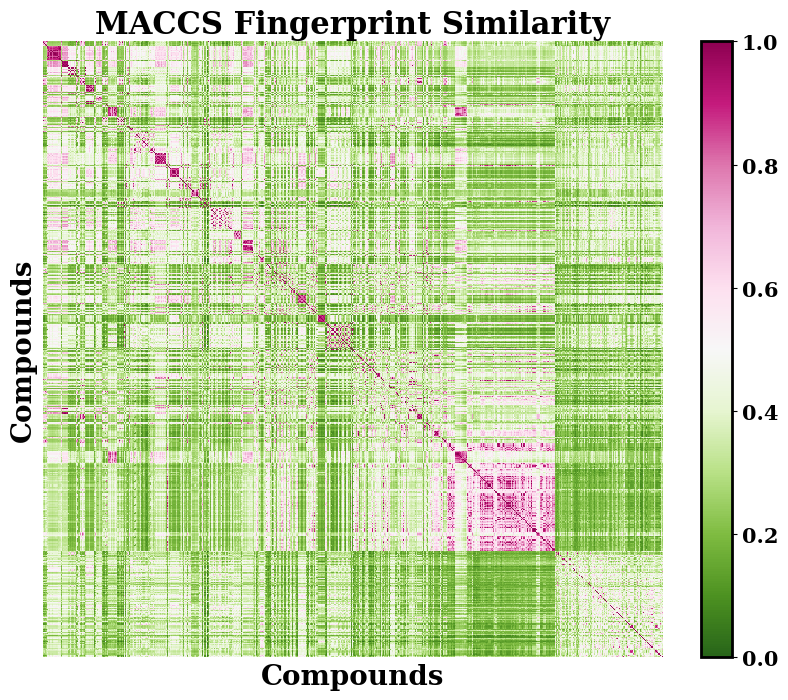

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 加载Tanimoto相似性矩阵文件
file_path = './物理属性/tanimoto_similarity_matrix_maccs.csv'
similarity_matrix = pd.read_csv(file_path, index_col=0)

# 绘制热图
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(similarity_matrix, cmap='PiYG_r', annot=False, 
                      xticklabels=False, yticklabels=False)
plt.title('MACCS Fingerprint Similarity', fontsize=22, fontweight='bold')
plt.xlabel('Compounds', fontsize=20, fontweight='bold')
plt.ylabel('Compounds', fontsize=20, fontweight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 设置图例字体大小
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=15)

# 设置边框宽度
ax = plt.gca()  # 获取当前轴
for spine in ax.spines.values():
    spine.set_linewidth(2)  # 设置边框线宽为2
    
# 设置图例边框宽度
colorbar.outline.set_linewidth(2)

# 保存图片为TIFF格式，分辨率600 dpi
plt.savefig('./物理属性/tanimoto_similarity_heatmap.tif', format='tiff', dpi=600)

plt.show()


In [ ]:
# RDKit Fingerprint
from rdkit.Chem import RDKFingerprint
fps = [RDKFingerprint(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# Topological Torsion Fingerprint
from rdkit.Chem import AllChem
fps = [AllChem.GetHashedTopologicalTorsionFingerprintAsBitVect(Chem.MolFromSmiles(smi)) for smi in smiles_list]

# MACCS Keys
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(Chem.MolFromSmiles(smi)) for smi in smiles_list]
